In [505]:
# Created by Dr. Moh Khalaf to help my team to review basics concepts
# torch
import torch
from torch import nn

# computer vision
import torchvision
from torchvision import datasets , transforms
from torchvision.transforms import ToTensor

#  DataLoader
from torch.utils.data import DataLoader
#TensorDataset is a class from the torch.utils.data module that is used to store data in the form of tensors. 
#It is particularly useful when you want to pair input data (features) with corresponding labels, creating a dataset 
#that can be easily used with PyTorch DataLoader
from torch.utils.data import TensorDataset  

# Visualization 
import matplotlib.pylab as plt 
# import the timer 
from timeit import default_timer as timer
# from tqdm import tqdm
from tqdm.auto import tqdm

import random    # to use the random.samples()

# Checks if a CUDA-capable GPU is available on the system
device = "cuda" if torch.cuda.is_available() else "cpu"

#### DataLoader:
* <span style="color:blue;">__Iterate over data in batches:__ </span> This is crucial for training deep learning models, as feeding the entire dataset at once is usually not feasible due to memory limitations.
* <span style="color:blue;">__Shuffle the data (optional):__</span> Shuffling helps to prevent the model from overfitting to the training data by presenting it in a random order during each epoch.
* <span style="color:blue;">__Load data in parallel (optional):__</span> By utilizing multiple CPU cores or GPUs, DataLoader can significantly speed up data loading.
* <span style="color:blue;">__Apply custom data transformations:__</span> You can define functions to pre-process your data (e.g., normalization, resizing) and integrate them with DataLoader.

### 1. Getting the dataset

In [506]:
train_data = datasets.FashionMNIST(
    root="data", # the folder name to download it in
    train=True,  # train--> True , Test --> False
    download=True,  # download
    transform=torchvision.transforms.ToTensor(), # how to transform the data
    target_transform=None  # # how to transform the Label    
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=torchvision.transforms.ToTensor(), # or transform=ToTensor()
    #ToTensor() convert PIL or Numpy.ndarray(H * W * C) in the range[0,255] to (C * H * W) in the range [0.0, 1.0]
    target_transform=None
)

In [507]:
classNames = train_data.classes
classIndex = train_data.class_to_idx
classNames , classIndex

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [508]:
# number of class = 10 then output shape = 10 

In [509]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### check the data

In [510]:
image , label = train_data[2]

#check the shape
print(image.shape) #---> the shape is torch.Size([1, 28, 28]) plt.imshow() is a function in Matplotlib,
#typically used to display images in Python. It takes an array 
#(often a 2D array for grayscale images or a 3D array for RGB images) as input and visualizes it as an image.

torch.Size([1, 28, 28])


### Create visualization function 
used to visualize the images and labels of data like train_data, teest_data, .....

In [511]:
print(test_data[0][0].dtype)

torch.float32


In [512]:
def plot_fn(data , cmap1 = None , title1 = None, text :str = ""):
    # visualize some data (images)
    torch.manual_seed(42)
    fig = plt.figure(figsize=(12,12))
    rows , cols = 4 , 4
  # Use padding with spaces for approximate centering
    print(f'"\n" + " " * 20 + "----------- Plotting  2 * 8 samples with label  {text}-----------" + "\n"')
    for i in range(0 , rows*cols):
        imageSelcted, labelSelected = data[i]
        fig.add_subplot(rows,cols,i+1)
        image , label = data[i]
        imagesReshape = image.squeeze()
        plt.imshow(imagesReshape )

        cmap = cmap1[i] if cmap1 is not None else "gray"
        title = title1[i] if title1 is not None else classNames[label]     
            
        plt.imshow(imagesReshape , cmap=cmap )   
        plt.title(title)
        plt.axis(False)
        

"
" + " " * 20 + "----------- Plotting  2 * 8 samples with label  train data-----------" + "
"


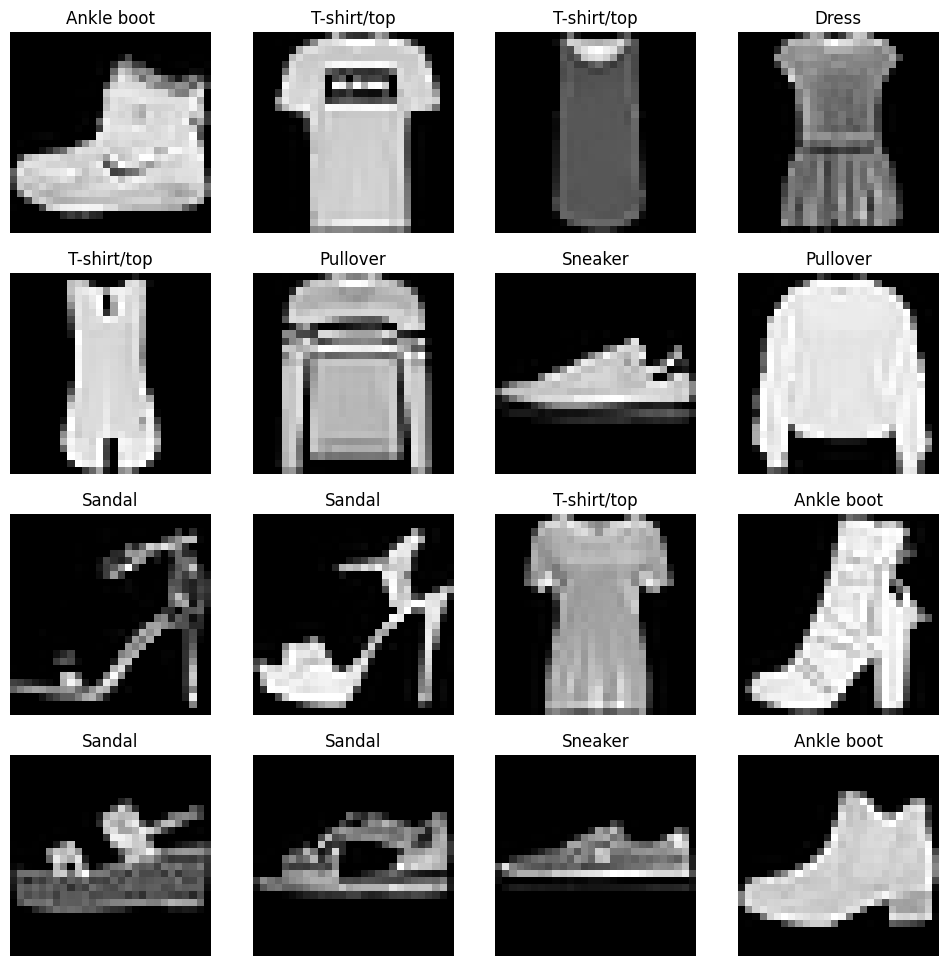

In [513]:
plot_fn(train_data , text="train data")

In [514]:
# setup the batch size hyperparameter to divide the data set to avoid got infinte computing power 
BATCH_SIZE = 32
# Turn data sets into iterables ( batches)
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
len(train_dataloader) , len(test_dataloader) 

(1875, 313)

In [515]:
### check the data output from the dataloader
train_data_features_batch , train_data_label_batch=next(iter(train_dataloader))
print(f"train_data_features/batch : {train_data_features_batch.shape}")
print(f"train_data_label features/batch : {train_data_label_batch.shape}")

train_data_features/batch : torch.Size([32, 1, 28, 28])
train_data_label features/batch : torch.Size([32])


## Building a Convolutional Neural Network (CNN) Model

<img src="src/img/tiny.jpg" alt="Tiny image"  height="200">


In [516]:
# Create the Model class
class model_v1(nn.Module):
    def __init__(self, inputShape:int, hidden_units:int, 
                 output:int, H:int, W:int): 
        super().__init__()
        ###---------- Block 1-------------------
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=inputShape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)    # image size divided by 2 = [ 1 , H/2, w/2 ]                
                ) # get the max of 2*2 matrix which is 1 : this means kernal = 2
        ###-------------End of Block --------------
        
        ###-------------Start of Block 2 ----------
        self.block_2 = nn.Sequential(
              nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,stride=1, padding=1 ),
              nn.ReLU(),
              nn.Conv2d(in_channels=hidden_units,
                         out_channels=hidden_units,
                        kernel_size=3, 
                       stride=1, padding=1), 
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2,stride=2)    # image [1,H/2 , W/2 ] --> image [ 1 , H/4, W/4] 
                                             )
       
             ### --------------End of block 2 -------------      
            ### convert multidimension tensor to single dimension tensor
            ### --------------Start of output layer --------
         ### Dynamic calculation for Flatten layer input size
        
        self.classifier = nn.Sequential(
              nn.Flatten(),  # convert image from [1, H/4 , W/4 ] -to->  [ 1, H/4 * W/4 ]
              
              nn.Linear(in_features=int(hidden_units*H*W/(4*4)),out_features=output)  )
        
    def forward(self, x):
        x = self.block_1(x)
        # print("After block 1:", x.shape)
        x = self.block_2(x)
        # print("After block 2:", x.shape)
        x = self.classifier(x)
        # print("After classifier:", x.shape)
        return x
        # return self.classifier(self.block_2(self.block_1(x)))

### Create the model1

In [517]:
model1 =model_v1(inputShape=1, hidden_units=10, 
                 output = 10 , H=28 , W=28 )
print(model_v1.parameters(train_data_features_batch))
print(10*int((28/4)*(28/4)))

<generator object Module.parameters at 0x000001F950E55620>
490


### Create Accuracy function

In [518]:
# create function to calculate the accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """accuracy function needs to enter the True data and the predected data """
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    accuracy = (correct / len(y_pred)) * 100 
    return accuracy

### Create loss and optimizer

In [519]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), 
                             lr=0.1)

### Create the train function

In [520]:
def train_fn(model:nn.Module,
            data_loader:torch.utils.data.DataLoader,
            optimizer : torch.optim.SGD,
            loss_fn:torch.nn.Module,
            accuracy_fn, device : torch.device=device ):
    #initial values    
    trainLoss, trainAccuracy = 0 , 0
    model.to(device)
    model.train() # set the model in the training mode
    # start get the batch , images , lebals 
    # In PyTorch, enumerate(data_loader) is used to iterate over a DataLoader object
    # while also keeping track of the batch index. This is useful when you need both 
    # the batch data and its index in a training loop, for instance.
    for batch , ( X, y ) in enumerate(data_loader) :
        #send data to ( GPU or CPU)
        X , y = X.to(device) , y.to(device)
        # 1. Forward pass 
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred,y)
        trainLoss += loss
        trainAccuracy += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1)) 
#Example
# y_pred = torch.tensor([[0.2, 0.5, 0.3],
#                        [0.1, 0.4, 0.5],
#                        [0.6, 0.2, 0.2],
#                        [0.3, 0.3, 0.4]])

# # Find the index of the maximum value in each row
# predicted_classes = y_pred.argmax(dim=1)

# print(predicted_classes)  # Output: tensor([1, 2, 0, 2])
       
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()

        # 5.Optimizer step 
        optimizer.step()

    trainLoss /=len(data_loader)
    trainAccuracy /=len(data_loader)
    print(f" Model training Loss : {trainLoss:0.5f} | Model Accuracy : {trainAccuracy:0.2f} ")



### Create the test function

In [521]:
def test_fn( model:torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             accuracy_fn,
             device : torch.device=device):
  # initial values and setup
    testLoss , testAccuracy = 0 , 0
    model.to(device)
    model.eval() # put model in the evaluation mode
 # Turn on the infernce context manager 
    with torch.inference_mode():
        for X, y in data_loader:
            # send data to device
            X, y = X.to(device), y.to(device)
            # Forward pass 
            test_pred = model(X)
            #Calculate the loss and accuracy 
            testLoss += loss_fn(test_pred, y)
            testAccuracy+=accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim=1))
    testLoss = testLoss /len(data_loader)
    testAccuracy/=len(data_loader)
    print(f" Model testing Loss : {testLoss:0.5f} | Model testing Accuracy : {testAccuracy:0.2f} ")
            

        

### Create the Prediction function

In [522]:
   
def prediction_fn( model : torch.nn.Module, data : list , device : torch.device=device ):
    '''return the predicteded class'''
    predictionProbabilities =[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_out = model(sample)
            # get the probability
            pred_Probability = torch.softmax(pred_out.squeeze(), dim=0) #the softmax function is a crucial activation function. It maps a vector of numbers to a probability distribution.
            predictionProbabilities.append(pred_Probability.cpu())
    # use stack to turn probabilies list to Tensor
    prediction_results = torch.stack(predictionProbabilities)

    predectedClasses = prediction_results.argmax(dim = 1) # argmax (argument of the maximum) is a function that returns the argument (or input) that produces the maximum value of a given function.
    
    return predectedClasses 


### Training the model

In [523]:
torch.manual_seed(42)

startTime = timer()

epochs = 3
pbar = tqdm(total=len(test_dataloader), desc="taining ")
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_fn(data_loader=train_dataloader, 
        model=model1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn    )
        pbar.update(1)

endTime = timer()

print(f"total training time :{endTime-startTime}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
 Model training Loss : 0.66894 | Model Accuracy : 75.79 
Epoch: 1
---------
 Model training Loss : 0.35925 | Model Accuracy : 87.02 
Epoch: 2
---------
 Model training Loss : 0.32163 | Model Accuracy : 88.33 
total training time :184.1845983999956


### Testing the model

In [525]:
torch.manual_seed(42)

startTime = timer()

epochs = 3
pbar = tqdm(total=epochs, desc="Model Testing")
# for epoch in tqdm(range(epochs)):
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    test_fn(data_loader=test_dataloader, 
        model=model1, 
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn    )
    pbar.update(1)  # Update the progress bar by 1
pbar.close()  # Close the progress bar

endTime = timer()

print(f"total training time :{endTime-startTime}")

Model Testing:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
 Model testing Loss : 0.37182 | Model testing Accuracy : 86.64 
Epoch: 1
---------
 Model testing Loss : 0.37182 | Model testing Accuracy : 86.64 
Epoch: 2
---------
 Model testing Loss : 0.37182 | Model testing Accuracy : 86.64 
total training time :14.902241600007983


### Run the Model Prediction 
a) Create random samples from the test data


In [526]:
# import random
# # random.seed(20)  # from import random
# testImageSamples = []
# testImageLabels = []
# for sample , label in random.sample(list(test_data), k=20):  # k = number of samples
#     testImageSamples.append(sample)
#     testImageLabels.append(label)

# print(f"The shape of the test samples{ testImageSamples[1].shape}")


In [527]:
# testSamplesData = create_dataset(testImageSamples,testImageLabels)
# plot_fn(testSamplesData)

In [528]:
import random
import torch
from torch.utils.data import TensorDataset

random.seed(42)

#test_data is batched, with each batch having 32 samples.
testImageSamples = []
testImageLabels = []

# Select 20 random samples from test_data
for sample, label in random.sample(list(test_data), k=18):  # k = number of samples
    testImageSamples.append(sample)
    testImageLabels.append(label)

# Check the shape of one sample
print(f"The shape of a single sample: {testImageSamples[0].shape}")

# the test data is batched (shape of [32, H, W])

testImageSamples_tensor = torch.stack(testImageSamples)  # Stack to create a single tensor 

print(f"The shape of the batched test samples: {testImageSamples_tensor.shape}")  # This should give you a batch shape

# Create the dataset
testSampleDataset = create_tensor_dataset(testImageSamples_tensor, testImageLabels)


The shape of a single sample: torch.Size([1, 28, 28])
The shape of the batched test samples: torch.Size([18, 1, 28, 28])


titles---------------------------
['Sandal', 'Trouser', 'Sneaker', 'predicted:Pullover | Original:Coat', 'Dress', 'T-shirt/top', 'Coat', 'Sneaker', 'Trouser', 'Ankle boot', 'Sneaker', 'Pullover', 'T-shirt/top', 'Trouser', 'T-shirt/top', 'predicted:Dress | Original:Coat', 'Sandal', 'predicted:Pullover | Original:Coat']
"
" + " " * 20 + "----------- Plotting  2 * 8 samples with label  original data -----------" + "
"


Prediction: 100%|████████████████████████████████████████████████████████████████████| 313/313 [12:21<00:00,  2.37s/it]


-----------------------------------------


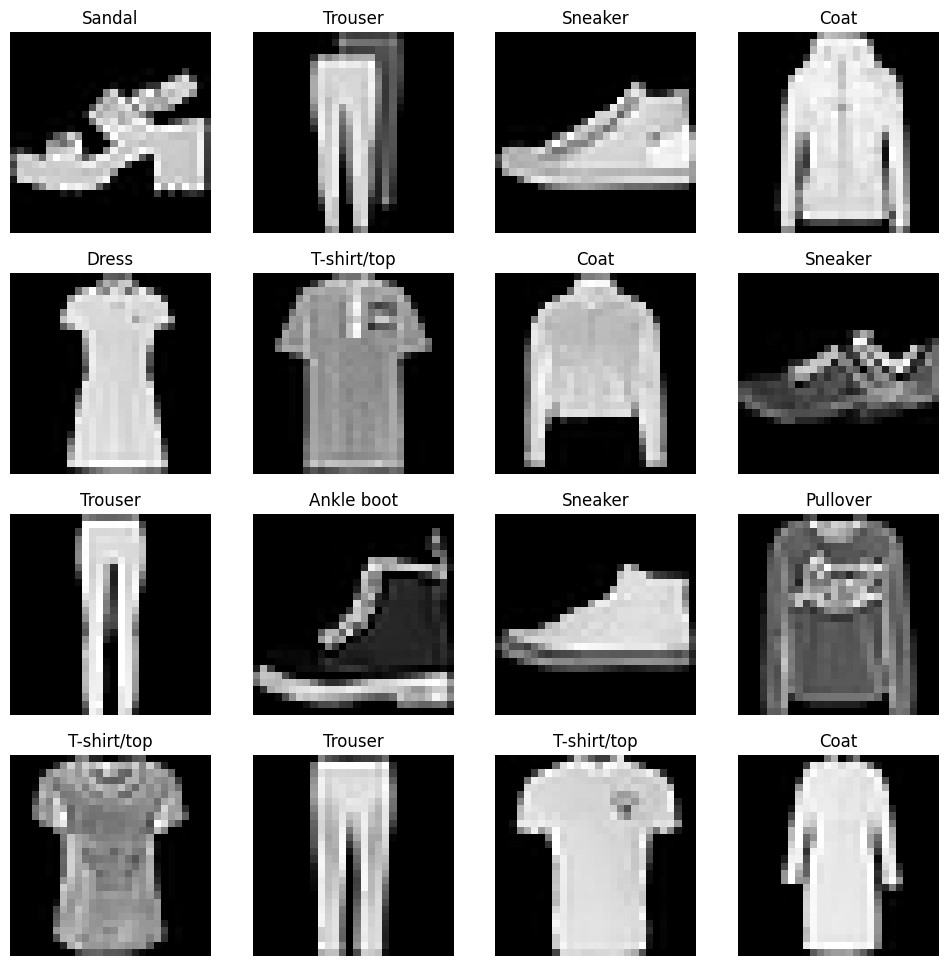

In [529]:
resultOfprediction = prediction_fn(model=model1, data=testImageSamples)  # Labels predicted
# Visualize the predictions
cmap = []
title=[]
   
for i in range(len(resultOfprediction)):
     if resultOfprediction[i] == testImageLabels[i]:
        cmap.append("gray")
        title.append(classNames[resultOfprediction[i]])
     else:
        cmap.append("Reds")
        title.append(f"predicted:{classNames[resultOfprediction[i]]} | Original:{classNames[testImageLabels[i]]}")



# print(f"cmap -----------------------out:\n{cmap}")
print(f"titles---------------------------\n{title}")
# print(f"prediction------------------------\n{resultOfprediction}")
# print(f"test samples used-----------------\n{ testImageLabels}")
# print(f"test samples used-----------------\n{ testImageSamples_tensor.shape}")

plot_fn(testSampleDataset, text="original data " )
dataPredicted = create_tensor_dataset(testImageSamples_tensor,resultOfprediction) # create the predicted data to able to use the plot function we create
print("-----------------------------------------")



"
" + " " * 20 + "----------- Plotting  2 * 8 samples with label  Predicted data-----------" + "
"
['Sandal', 'Trouser', 'Sneaker', 'predicted:Pullover | Original:Coat', 'Dress', 'T-shirt/top', 'Coat', 'Sneaker', 'Trouser', 'Ankle boot', 'Sneaker', 'Pullover', 'T-shirt/top', 'Trouser', 'T-shirt/top', 'predicted:Dress | Original:Coat', 'Sandal', 'predicted:Pullover | Original:Coat']


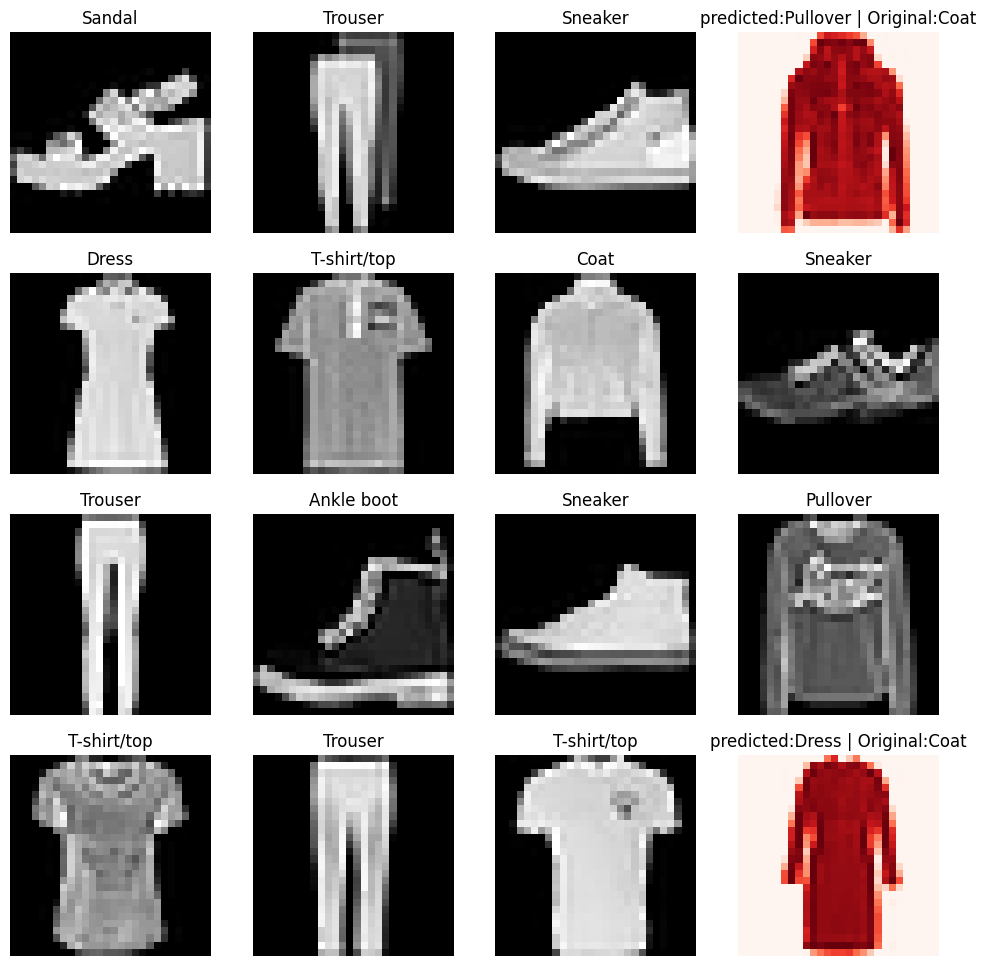

In [530]:
plot_fn(dataPredicted , cmap1=cmap, title1=title , text="Predicted data")
print(title)

## We were confused by the results for some items.
* __mlxtend__ :   is a Python library that provides various machine learning extensions, including data preprocessing, feature engineering, model evaluation, and visualization tools.--->> __plot_confusion_matrix__
* __torchmetrics__ : for __ConfusionMatrix__

In [540]:
# !pip install torchmetrics

In [563]:

TestImages, TestLabels , predictedTestData = [] , [] , []

pbar = tqdm(total=len(test_dataloader), desc="Prediction")

for X, y in test_dataloader :
    X , y = X.to(device) , y.to(device)
    TestImages =  X
    predictedTestData.append(prediction_fn(model=model1 , data=TestImages))
    pbar.update(1)  # Update the progress bar by 1
pbar.close()  




Prediction:   0%|          | 0/313 [00:00<?, ?it/s]

In [557]:
predictedTestData_tensor = torch.cat(predictedTestData) to converte the list of tensors ( 32 element / tensor) to one tensor

In [559]:
# test_data.targets labels

tensor([9, 2, 1,  ..., 8, 1, 5])

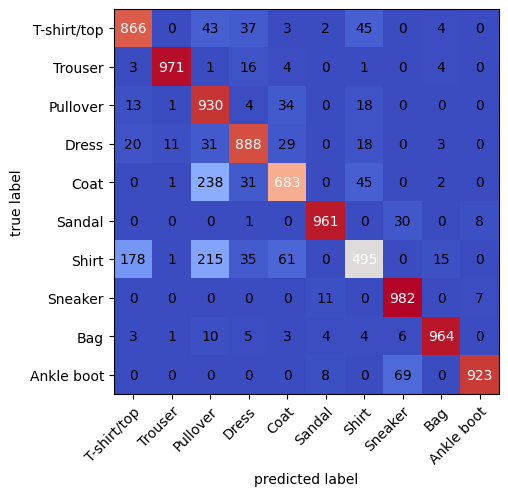

In [573]:
# !pip install mlxtend 
import mlxtend  , torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#  setup confusion instance and compare prediction to the original 
confMat = ConfusionMatrix(num_classes = len(classNames) , task = 'multiclass')
confMatTensor = confMat( preds = predictedTestData_tensor , target = test_data.targets )
# plot the confusion matrix
fig , ax = plot_confusion_matrix(
           conf_mat=confMatTensor.numpy(), 
           class_names=classNames, cmap='coolwarm',
           figsize=(5 , 5)
)


In [568]:
# save the model
torch.save(obj=model1.state_dict(), f = ""model1.pt)